In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from mpl_toolkits import mplot3d
import sklearn.cluster as skc
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, datasets
from sklearn.svm import LinearSVC
from sklearn import tree 
from sklearn.model_selection import GridSearchCV

In [2]:
path = r'E:\\学业\\IPS\\组会\\task_3\\03_trainingData_B1_withCluster.csv'

In [3]:
with open(path,encoding='utf-8')as f:
    data = np.loadtxt(path, dtype=str, delimiter=',')
train_df = pd.read_csv(path, header=0)
train_df = train_df[:]
train_df = train_df.replace('*',-110)

In [4]:
train_df_features = np.asarray(train_df.iloc[:,1:201])

In [5]:
train_df_features

array([[-110, -110, '-88', ..., -110, -110, -110],
       [-110, -110, '-87', ..., -110, -110, -110],
       [-110, -110, '-88', ..., -110, -110, -110],
       ...,
       [-110, -110, -110, ..., -110, -110, -110],
       [-110, -110, -110, ..., -110, -110, -110],
       [-110, -110, -110, ..., -110, -110, -110]], dtype=object)

In [6]:
train_df_label = np.asarray(train_df.iloc[:,204:205])

In [7]:
train_df_label

array([[ 2],
       [ 2],
       [ 2],
       ...,
       [16],
       [16],
       [16]], dtype=int64)

In [8]:
X_train,X_test,y_train,y_test = train_test_split(train_df_features,train_df_label,test_size=0.3)

In [9]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3673, 200) (1575, 200) (3673, 1) (1575, 1)


In [10]:
model = LinearSVC(C=10)
model.fit(X_train,y_train)
pred = model.predict(X_test)


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [11]:
SVM_score =model.score(X_test,y_test)

In [12]:
SVM_score

0.9561904761904761

In [13]:
loc_df2 = pd.DataFrame()
loc_df2['longitude'] = train_df.LONGITUDE
loc_df2['latitude'] = train_df.LATITUDE
loc_df2['label'] = train_df_label

In [14]:
loc_df2

,longitude,latitude,label
0,10.215255,35.094452,2
1,10.215255,35.094452,2
2,10.215255,35.094452,2
3,10.215255,35.094452,2
4,10.215255,35.094452,2
...,...,...,...
5243,108.836455,91.295152,16
5244,108.836455,91.295152,16
5245,108.836455,91.295152,16
5246,108.836455,91.295152,16


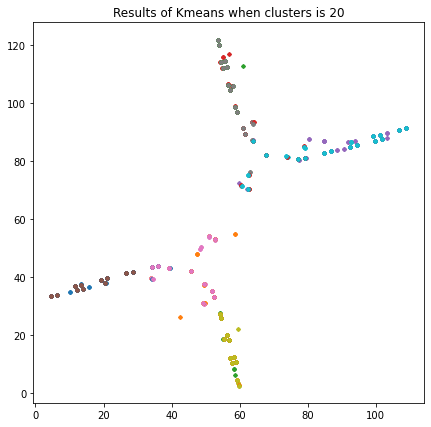

In [15]:
plt.figure(figsize = (7,7))
for label in loc_df2.label.unique():
    plt.plot(loc_df2.longitude[loc_df2.label==label],loc_df2.latitude[loc_df2.label==label],'.',markersize = 5)
plt.title('Results of Kmeans when clusters is 20')
plt.show()

In [16]:
X_train,X_test,y_train,y_test = train_test_split(train_df_features,train_df_label,test_size=0.3)

In [17]:
KNN=KNeighborsClassifier(n_neighbors=2)

In [18]:
KNN.fit(X_train,y_train)
KNN_score = KNN.score(X_test,y_test)

D:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [19]:
KNN_score 

0.9657142857142857

D:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self

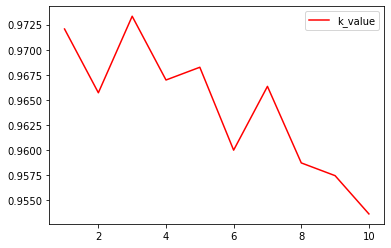

In [20]:
test = []
for k in range(1,11,1):
    KNN=KNeighborsClassifier(n_neighbors=k)
    KNN = KNN.fit(X_train, y_train)
    score = KNN.score(X_test, y_test)
    test.append(score)
plt.plot(range(1,11,1),test,color="red",label="k_value")
plt.legend()
plt.show()

In [21]:
path = r'E:\\学业\\IPS\\组会\\task_3\\03_validationData_B1.csv'

In [22]:
with open(path,encoding='utf-8')as f:
    data = np.loadtxt(path, dtype=str, delimiter=',')
train_df = pd.read_csv(path, header=0)
train_df = train_df[:]
train_df = train_df.replace('*',-110)

In [23]:
train_df_features = np.asarray(train_df.iloc[:,1:201])

In [24]:
train_df_features.shape

(536, 200)

In [25]:
loc_df2 = loc_df2
loc_df2 = pd.DataFrame()
loc_df2['longitude'] = train_df.LONGITUDE
loc_df2['latitude'] = train_df.LATITUDE
loc_df2['label'] = 0

In [26]:
loc_df2

,longitude,latitude,label
0,0.006800,36.637341,0
1,6.043596,39.768859,0
2,6.214495,39.691346,0
3,7.031152,37.504961,0
4,10.123977,35.071746,0
...,...,...,...
531,107.505519,86.179367,0
532,107.907183,90.723944,0
533,108.726355,91.911652,0
534,108.748581,91.524822,0


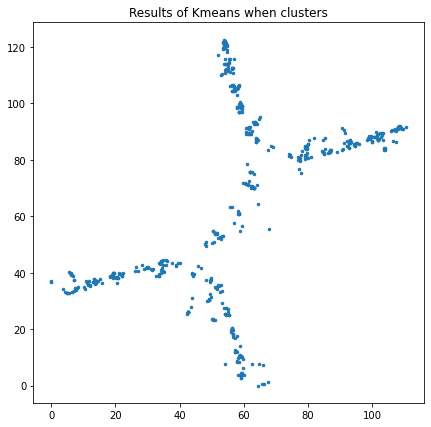

In [27]:
plt.figure(figsize = (7,7))
for label in loc_df2.label.unique():
    plt.plot(loc_df2.longitude[loc_df2.label==label],loc_df2.latitude[loc_df2.label==label],'.',markersize = 5)
plt.title('Results of Kmeans when clusters')
plt.show()

In [28]:
train_df_features = np.asarray(train_df.iloc[:,1:201])

In [29]:
train_df_features

array([[-110, -110, -110, ..., -110, -110, -110],
       [-110, -110, -110, ..., -110, -110, -110],
       [-110, -110, -110, ..., -110, -110, -110],
       ...,
       ['-85', -110, -110, ..., -110, -110, -110],
       [-110, -110, -110, ..., -110, -110, -110],
       [-110, -110, -110, ..., -110, -110, -110]], dtype=object)

In [30]:
path = r'C:\\Users\\Codex\\Desktop\\IPS\\组会\\task_3\\03_validationData_B1.csv'
with open(path,encoding='utf-8')as f:
    data = np.loadtxt(path, dtype=str, delimiter=',')
valid_df = pd.read_csv(path, header=0)
valid_df = valid_df.replace('*',-110)

In [31]:
valid_df

,ID,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,...,WAP195,WAP196,WAP197,WAP198,WAP199,WAP200,LONGITUDE,LATITUDE,FLOOR,LABEL
0,1,-110,-110,-110,-110,-110,-92,-110,-110,-110,...,-110,-110,-110,-110,-110,-110,0.006800,36.637341,1,2
1,2,-110,-110,-110,-110,-110,-110,-110,-110,-110,...,-110,-110,-110,-110,-110,-110,6.043596,39.768859,1,2
2,3,-110,-110,-110,-110,-110,-110,-110,-110,-110,...,-110,-110,-110,-110,-110,-110,6.214495,39.691346,1,2
3,4,-110,-110,-110,-110,-110,-110,-110,-110,-110,...,-110,-110,-110,-110,-110,-110,7.031152,37.504961,1,2
4,5,-110,-110,-110,-110,-110,-110,-110,-110,-110,...,-110,-110,-110,-110,-110,-110,10.123977,35.071746,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,532,-110,-110,-110,-95,-110,-110,-110,-110,-110,...,-94,-110,-110,-110,-110,-110,107.505519,86.179367,4,16
532,533,-110,-110,-110,-94,-110,-110,-110,-94,-110,...,-110,-110,-110,-110,-110,-110,107.907183,90.723944,4,16
533,534,-85,-110,-110,-110,-110,-110,-110,-82,-110,...,-110,-110,-110,-110,-110,-110,108.726355,91.911652,4,16
534,535,-110,-110,-110,-110,-110,-110,-110,-110,-91,...,-110,-110,-110,-110,-110,-110,108.748581,91.524822,4,16


In [32]:
path = r'E:\\学业\\IPS\\组会\\task_3\\03_trainingData_B1_withCluster.csv'
with open(path,encoding='utf-8')as f:
    data = np.loadtxt(path, dtype=str, delimiter=',')
train_df = pd.read_csv(path, header=0)
train_df = train_df[:]
train_df = train_df.replace('*',-110)

In [33]:
train_df_features = np.asarray(train_df.iloc[:,1:201])

In [34]:
train_df_features.shape

(5248, 200)

In [35]:
train_df_labels = np.asarray(train_df.iloc[:,204:205])

In [36]:
train_df_labels.shape

(5248, 1)

In [37]:
valid_df_features = np.asarray(valid_df.iloc[:,1:201])


In [38]:
valid_df_features

array([[-110, -110, -110, ..., -110, -110, -110],
       [-110, -110, -110, ..., -110, -110, -110],
       [-110, -110, -110, ..., -110, -110, -110],
       ...,
       ['-85', -110, -110, ..., -110, -110, -110],
       [-110, -110, -110, ..., -110, -110, -110],
       [-110, -110, -110, ..., -110, -110, -110]], dtype=object)

In [39]:
valid_df_labels = np.asarray(valid_df.iloc[:,204:205])

In [40]:
train_df_features

array([[-110, -110, '-88', ..., -110, -110, -110],
       [-110, -110, '-87', ..., -110, -110, -110],
       [-110, -110, '-88', ..., -110, -110, -110],
       ...,
       [-110, -110, -110, ..., -110, -110, -110],
       [-110, -110, -110, ..., -110, -110, -110],
       [-110, -110, -110, ..., -110, -110, -110]], dtype=object)

In [41]:
X_train,X_test,y_train,y_test = train_df_features,valid_df_features,train_df_labels,valid_df_labels

In [42]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(5248, 200) (536, 200) (5248, 1) (536, 1)


In [43]:
KNN=KNeighborsClassifier(n_neighbors=60)

In [44]:
KNN.fit(X_train,y_train)

D:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=60)

In [45]:
KNN_score = KNN.score(X_test,y_test)

In [46]:
KNN_score

0.8544776119402985

In [47]:
model = LinearSVC(C=7)
model.fit(X_train,y_train)
pred = model.predict(X_test)
SVM_score =model.score(X_test,y_test)


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [48]:
SVM_score

0.7854477611940298

In [49]:
'''
def test_LinearSVC_C(*data):
    '''
    测试 LinearSVC 的预测性能随参数 C 的影响
    '''
    X_train,X_test,y_train,y_test=data
    Cs=np.logspace(-2,1)
    train_scores=[]
    test_scores=[]
    for C in Cs:
        cls=svm.LinearSVC(C=C)
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test,y_test))

    ## 绘图
    
    print(max(test_scores))
    print(test_scores.index(max(test_scores)))
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(Cs,train_scores,label="Traing score")
    ax.plot(Cs,test_scores,label="Testing score")
    ax.set_xlabel(r"C")
    ax.set_ylabel(r"score")
    ax.set_xscale('log')
    ax.set_title("LinearSVC")
    ax.legend(loc='best')
    plt.show()
    
# 调用 test_LinearSVC_C
test_LinearSVC_C(X_train,X_test,y_train,y_test)
'''

IndentationError: unexpected indent (3512704855.py, line 4)

In [50]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)

In [51]:
score

0.7052238805970149

In [52]:
'''
test = []
for k in range(1,201):
    KNN=KNeighborsClassifier(n_neighbors=k)
    KNN = KNN.fit(X_train, y_train)
    score = KNN.score(X_test, y_test)
    test.append(score)
plt.plot(range(1,201),test,color="blue",label="k_value")
plt.legend()
plt.show()
'''

'\ntest = []\nfor k in range(1,201):\n    KNN=KNeighborsClassifier(n_neighbors=k)\n    KNN = KNN.fit(X_train, y_train)\n    score = KNN.score(X_test, y_test)\n    test.append(score)\nplt.plot(range(1,201),test,color="blue",label="k_value")\nplt.legend()\nplt.show()\n'

In [53]:
print(max(test))
print(test.index(max(test)))

0.9733333333333334
2


In [54]:
train_df_features.shape

(5248, 200)

In [55]:
kmeans = KMeans(n_clusters = 20, random_state = 2, n_init =10).fit(train_df_features)
label = kmeans.labels_


In [56]:
plot_3d = pd.DataFrame()

In [57]:
plot_3d['longitude']=train_df.LONGITUDE
plot_3d['latitude']=train_df.LATITUDE
plot_3d['floor']= train_df.FLOOR
plot_3d['label']=label

In [58]:
plot_3d

,longitude,latitude,floor,label
0,10.215255,35.094452,1,8
1,10.215255,35.094452,1,8
2,10.215255,35.094452,1,8
3,10.215255,35.094452,1,8
4,10.215255,35.094452,1,8
...,...,...,...,...
5243,108.836455,91.295152,4,10
5244,108.836455,91.295152,4,10
5245,108.836455,91.295152,4,10
5246,108.836455,91.295152,4,10


In [59]:
plot_3d.longitude[plot_3d.label==label]

0        10.215255
1        10.215255
2        10.215255
3        10.215255
4        10.215255
           ...    
5243    108.836455
5244    108.836455
5245    108.836455
5246    108.836455
5247    108.836455
Name: longitude, Length: 5248, dtype: float64

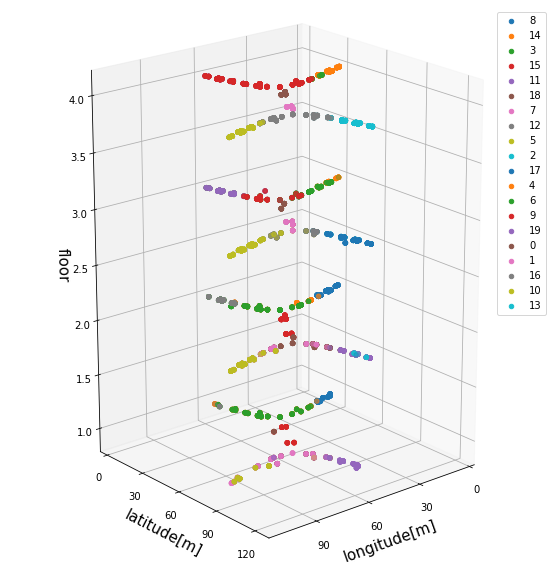

In [62]:
#如何画3d图根据floor,一共分成20.

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection= '3d')
ax.view_init(20,50)

#设置长宽高的比例
ax.set_box_aspect(aspect = (1,1,1.5))

#调整坐标轴
x_major_locator=MultipleLocator(30)
y_major_locator=MultipleLocator(30)
ax=plt.gca()

ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)

for label in plot_3d.label.unique():
    
    xdata = plot_3d.longitude[plot_3d.label==label]
    
    ydata = plot_3d.latitude[plot_3d.label==label]
    
    zdata = plot_3d.floor[plot_3d.label==label]
    
    #print(label)
    
   
    points = ax.scatter3D(xdata, ydata, zdata,label = label)
    ax.legend()

    #handles, label = ax.get_legend_handles_labels()
    #print(handles, labels)
    # reverse the order


#ax.legend()
ax.set_xlabel("longitude[m]",fontsize = 15)
ax.set_ylabel("latitude[m]",fontsize = 15)
ax.set_zlabel("floor",fontsize = 15)
plt.show()

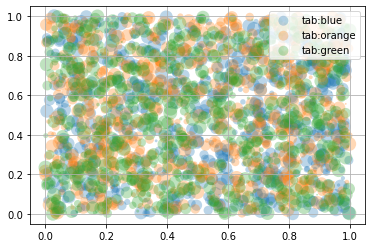

In [61]:
#举例如何画图例
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

fig, ax = plt.subplots()
for color in ['tab:blue', 'tab:orange', 'tab:green']:
    n = 750
    x, y = np.random.rand(2, n)
    scale = 200.0 * np.random.rand(n)
    ax.scatter(x, y, c=color, s=scale, label=color,
               alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()

In [ ]:
train_df

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection= '3d')
ax.view_init(20,20)
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='gray')

plt.show()